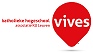<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
**SEARCH ALGORITHMS**<br>
Stefaan Haspeslagh & Andy Louwyck

---



---



#**SEARCH EXERCISER: HEURISTIC SEARCH**

This notebook explains how to use `SearchExerciser` to apply heuristic search algorithms. 

##Cloning the GitHub repo

The `SearchExerciser` package is cloned from Github repository https://github.com/alouwyck/SearchExerciser:

In [1]:
import os, shutil

# remove directory 'SearchExerciser' if it already exists
path = "SearchExerciser"
if os.path.exists(path):
    shutil.rmtree(path)

# clone SearchExerciser repository
!git clone https://github.com/alouwyck/SearchExerciser

# move SearchExerciser package directory to current working directory
os.rename(path, 'temp')
shutil.copytree(os.path.join('temp', path), path);
shutil.rmtree('temp')

Cloning into 'SearchExerciser'...
remote: Enumerating objects: 244, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 244 (delta 143), reused 167 (delta 70), pack-reused 0
Receiving objects: 100% (244/244), 247.93 KiB | 10.78 MiB/s, done.
Resolving deltas: 100% (143/143), done.


## Importing the search algorithms

The following heuristic search algorithms are avaible with `SearchExerciser`:

- Hill climbing (HC)
- Greedy search (GS)
- Beam search (BS)

The algorithms are implemented in module `search.heuristic`:

In [7]:
from SearchExerciser.search.heuristic import HC, GS, BS

`HC`, `GS`, and `BS` are classes.

##Solving a maze problem

###Creating the maze

Recall that we need to import class `Maze` from module `maze` to create a maze:

In [2]:
from SearchExerciser.maze import Maze

The maze grid is defined by passing a list of strings to static method `Maze.create`. The following characters are used to indicate different grid cells:
- start: `'*'`
- goal: `'o'`
- wall: `'#'`
- free: `'.'`

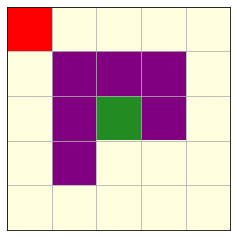

In [3]:
maze = Maze.create(['o....',
                    '.###.',
                    '.#*#.',
                    '.#...',
                    '.....'])
maze.plot()

To solve maze problems applying one of the heuristic search algorithms, the Manhattan distance to the goal is used as heuristic function. This distance is returned by method `distance_to_goal`. For instance, the Manhattan distance from start to goal is 4:

In [4]:
start = maze.get_start_position()
goal = maze.get_goal_position()
distance = maze.distance_to_goal(start)
print(f"Manhattan distance from start {start} to goal {goal} is {distance}")

Manhattan distance from start (2, 2) to goal (0, 0) is 4


To calculate the Manhattan distance for any grid cell `(irow, icol)`, we need to import class `Position` from module `maze`:

In [5]:
from SearchExerciser.maze import Position
maze.distance_to_goal(Position(irow=4, icol=4))  # cell in lower right corner

8

### Hill climbing

Just like depth-first search, hill climbing applies the LIFO method, but before added to the queue, the new paths are ordered by the heuristic value of the last node.

ALGORITHM: Hill Climbing
RESULT: SUCCES
Elapsed time: 0.0020651817321777344 seconds
Number of iterations: 10
Maximum length of queue: 4


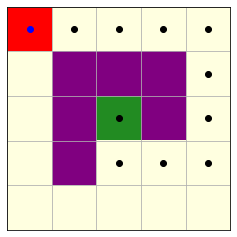

In [14]:
maze.search(HC).plot()

### Greedy search

As the name suggests, the greedy search algorithm always selects the path which is closest to the goal. This means greedy search sorts the entire queue by heuristic value, not only the newly created paths.

ALGORITHM: Greedy search
RESULT: SUCCES
Elapsed time: 0.0015559196472167969 seconds
Number of iterations: 9
Maximum length of queue: 4


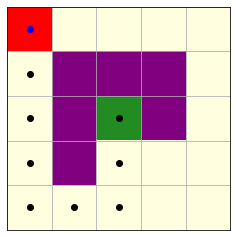

In [12]:
maze.search(GS).plot()

### Beam search

The beam search algorithm creates all children to all paths in the queue and keeps the `width` paths with the lowest heuristic value. In this way, the number of paths in the queue cannot be larger than `width`. So, this is parameter is required input to method `search` if beam search `BS` is applied:  

In [15]:
path = maze.search(BS, width=2, print_queue=True)

Initial queue:
o....  
.###.  
.#x#.  
.#...  
.....  

Iteration 1
All paths removed from queue.
New paths:
o....  
.###.  
.#x#.  
.#x..  
.....  
Paths in queue:
o....  
.###.  
.#x#.  
.#x..  
.....  

Iteration 2
All paths removed from queue.
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#xx.  .#x..  
.....  ..x..  

Iteration 3
All paths removed from queue.
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#xxx  
.xx..  .....  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#.  
.#x..  .#xxx  
.xx..  .....  

Iteration 4
All paths removed from queue.
New paths:
o....  o....  
.###.  .###.  
.#x#.  .#x#x  
.#x..  .#xxx  
xxx..  .....  
Paths in queue:
o....  o....  
.###.  .###.  
.#x#.  .#x#x  
.#x..  .#xxx  
xxx..  .....  

Iteration 5
All paths removed from queue.
New paths:
o....  o....  
.###.  .###x  
.#x#.  .#x#x  
x#x..  .#xxx  
xxx..  .....  
Paths 

In this example, beam search finds the shortest path, but that is not always the case. Moreover, it is possible it finds no solution as it doesn't keep all paths in the queue.

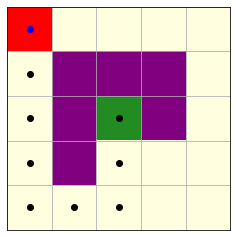

In [16]:
path.plot()

## Solving a graph problem

###Creating the graph

Recall that we need to import class `Graph` from module `graph` to create a graph:

In [17]:
from SearchExerciser.graph import Graph

Blind search algorithms do not take into account costs, but they use heuristic values. In case of a graph problem, these values are node attributes we need to pass as dictionary to method `Graph.create`:

In [18]:
graph = Graph.create(edges=[("S", "A"), ("S", "D"), ("A", "D"), ("A", "B"), ("D", "E"), 
                            ("B", "E"), ("B", "C"), ("E", "F"), ("F", "G")], 
                     heuristic={"S":11, "A":10.4, "B":6.7, "C":4, "D":8.9, "E":6.9, "F":3, "G":0})

We define the node coordinates and visualize the graph calling method `plot`:

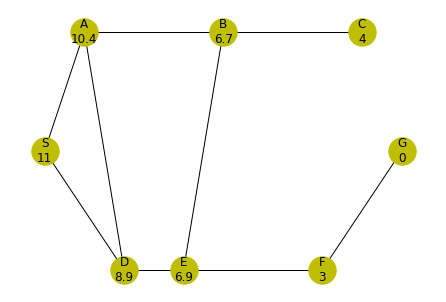

In [19]:
coordinates = dict(S=[0, 0.5], 
                   A=[1, 1],
                   D=[2, 0],
                   E=[3.5, 0],
                   B=[4.5, 1],
                   F=[7, 0],
                   C=[8, 1],
                   G=[9, 0.5])
graph.plot(coordinates)

The heuristic value of each node is added indeed to the plot of the graph. In this example, the heuristic values may be interpreted as an estimates of the distance based on bird's eye view (or as the crow flies). 

### Hill climbing

Hill climbing finds the shortest path in this case:

In [21]:
path = graph.search(HC, print_queue=True)

Initial queue:
[S(11.0)]

Iteration 1
Path removed from queue:
S(11.0)
New paths:
[SD(8.9),SA(10.4)]
Paths in queue:
[SD(8.9),SA(10.4)]

Iteration 2
Path removed from queue:
SD(8.9)
New paths:
[SDE(6.9),SDA(10.4)]
Paths in queue:
[SDE(6.9),SDA(10.4),SA(10.4)]

Iteration 3
Path removed from queue:
SDE(6.9)
New paths:
[SDEF(3.0),SDEB(6.7)]
Paths in queue:
[SDEF(3.0),SDEB(6.7),SDA(10.4),SA(10.4)]

Iteration 4
Path removed from queue:
SDEF(3.0)
New paths:
[SDEFG(0.0)]
Paths in queue:
[SDEFG(0.0),SDEB(6.7),SDA(10.4),SA(10.4)]

Path to goal found in new paths:
SDEFG(0.0)

ALGORITHM: Hill Climbing
RESULT: SUCCES
Elapsed time: 0.0029191970825195312 seconds
Number of iterations: 4
Maximum length of queue: 4


Note that the heuristic value of each path is also printed now.

### Greedy search

The greedy search algorithm also finds the shortest path:

In [22]:
path = graph.search(GS, print_queue=True)

Initial queue:
[S(11.0)]

Iteration 1
Path removed from queue:
S(11.0)
New paths:
[SA(10.4),SD(8.9)]
Paths in queue:
[SD(8.9),SA(10.4)]

Iteration 2
Path removed from queue:
SD(8.9)
New paths:
[SDA(10.4),SDE(6.9)]
Paths in queue:
[SDE(6.9),SDA(10.4),SA(10.4)]

Iteration 3
Path removed from queue:
SDE(6.9)
New paths:
[SDEB(6.7),SDEF(3.0)]
Paths in queue:
[SDEF(3.0),SDEB(6.7),SDA(10.4),SA(10.4)]

Iteration 4
Path removed from queue:
SDEF(3.0)
New paths:
[SDEFG(0.0)]
Paths in queue:
[SDEFG(0.0),SDEB(6.7),SDA(10.4),SA(10.4)]

Path to goal found in new paths:
SDEFG(0.0)

ALGORITHM: Greedy search
RESULT: SUCCES
Elapsed time: 0.0039446353912353516 seconds
Number of iterations: 4
Maximum length of queue: 4


###Beam search

Finally, the beam search algorithm also finds the shortest path, even if we only keep 1 path in the queue, i.e. if `width=1`:

In [24]:
graph.search(BS, width=1, print_queue=True);

Initial queue:
[S(11.0)]

Iteration 1
All paths removed from queue.
New paths:
[SD(8.9)]
Paths in queue:
[SD(8.9)]

Iteration 2
All paths removed from queue.
New paths:
[SDE(6.9)]
Paths in queue:
[SDE(6.9)]

Iteration 3
All paths removed from queue.
New paths:
[SDEF(3.0)]
Paths in queue:
[SDEF(3.0)]

Iteration 4
All paths removed from queue.
New paths:
[SDEFG(0.0)]
Paths in queue:
[SDEFG(0.0)]

Path to goal found in new paths:
SDEFG(0.0)

ALGORITHM: Beam search
RESULT: SUCCES
Elapsed time: 0.012485980987548828 seconds
Number of iterations: 4
Maximum length of queue: 1
